# Naive Bayes Classifier

- Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem..

# Bayes Theorem:

# Types of Naive Bayes Classifier

1. Bernoulli Naive Bayes
-  It assumes that all our features are binary such that they take only two 
    values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs 
    in the document.

2. Multinomial Naive Bayes
- It is used when we have discrete data (e.g. movie ratings ranging 1 
    and 5 as each rating will have certain frequency to represent). In text learning we have the count 
    of each word to predict the class or label.

3. Gaussian Naive Bayes
- continuous values associated with each feature are assumed to be distributed 
    according to a Gaussian distribution.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("F:\PGDDS\PGD_Data_Science\csv_data\Titanic.xlsx")

In [3]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], inplace = True, axis = 1)

In [5]:
df.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Embarked  889 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [7]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64

- Now We have to drop null values from Embarked column

In [8]:
df.dropna(subset=['Embarked'], inplace = True)

In [9]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      0
Survived      0
dtype: int64

In [10]:
x = df['Age'].mean()

In [11]:
x

29.64209269662921

In [12]:
round(x)

30

In [13]:
df['Age'] = df['Age'].fillna(round(x))

In [14]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

- Now we apply get_dummies method on columns

In [15]:
final = pd.get_dummies(data = df, columns=['Sex', 'Embarked'], drop_first=True)

In [16]:
final.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,1,0,1
1,1,38.0,1,0,0,0
2,3,26.0,1,0,0,1
3,1,35.0,1,0,0,1
4,3,35.0,0,1,0,1


In [17]:
X = final.drop('Survived', axis = 1)

In [18]:
y = final.Survived

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
X_train.shape

(711, 5)

In [22]:
X_test.shape

(178, 5)

In [23]:
from sklearn.naive_bayes import BernoulliNB

In [24]:
model = BernoulliNB()

In [25]:
model.fit(X_train, y_train)

BernoulliNB()

In [26]:
model.score(X_test, y_test)

0.797752808988764

- first 5 sample of our X_test


In [27]:
X_test[:5]

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
281,3,28.0,1,0,1
435,1,14.0,0,0,1
39,3,14.0,0,0,0
418,2,30.0,1,0,1
585,1,18.0,0,0,1


- Its answer is in y_test, so we check the sample of y_test

In [28]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

- Now will predict according to BernoulliNB

In [29]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

- Also we can apply another two types of naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.7808988764044944

In [31]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)
mb.score(X_test, y_test)

0.7078651685393258

- Now will plot confusion matrix according to BernoulliNB

In [32]:
predicted = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_test, predicted)

<AxesSubplot:>

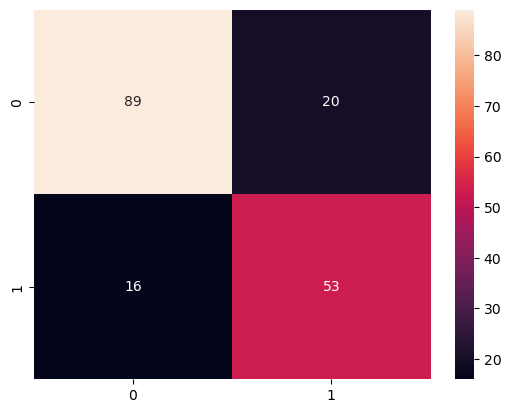

In [35]:
import seaborn as sns
sns.heatmap(cm, annot = True)

- Confusion matrix with respect to GaussianNB

<AxesSubplot:>

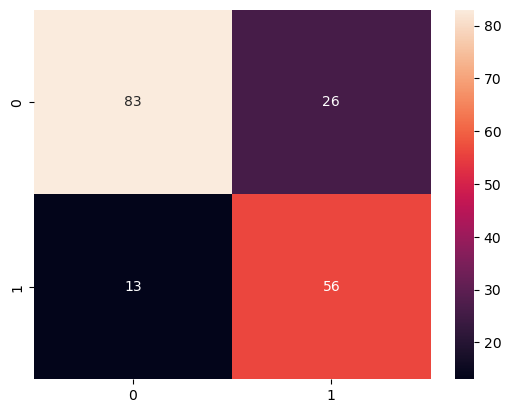

In [37]:
predicted = nb.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
import seaborn as sns
sns.heatmap(cm, annot = True)

<AxesSubplot:>

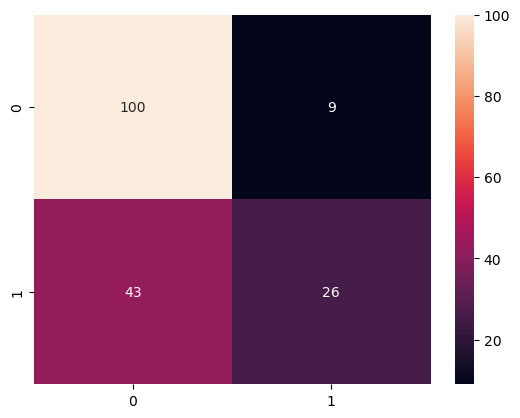

In [39]:
predicted = mb.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
import seaborn as sns
sns.heatmap(cm, annot = True, fmt = 'd')